## Fatores socioeconômicos e Renda


Este dataset contém informações demográficas e socioeconômicas de indivíduos, incluindo idade, sexo, estado civil, nível de escolaridade, renda anual, ocupação e o tamanho da região onde vivem. 
Trata-se de uma base rica para estudos de segmentação de público, planejamento de políticas sociais ou desenvolvimento de estratégias de marketing direcionado.










In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

df = pd.read_csv('sgdata.csv', delimiter= ',')

In [3]:
print(df.columns)

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')


1. Nível de escolaridade: 
Neste dataset estudado observamos um nível alto de escolaridade (69%)

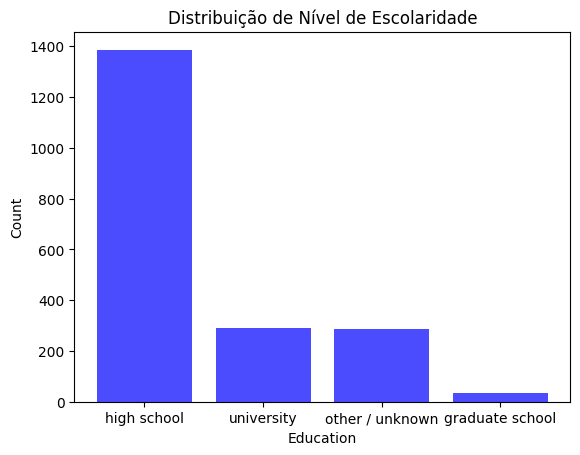

In [ ]:

# cálculo do eixo_y e ajustando o eixo_x
eixo_x = df['Education'].value_counts().index
eixo_y = df['Education'].value_counts().values

# Plotando o gráfico de barras
plt.bar(eixo_x, eixo_y, color='blue', alpha=0.7)
plt.xlabel('Escolaridade')
plt.ylabel('Quantidade de Pessoas')
plt.title('Distribuição de Nível de Escolaridade')
plt.show()


2. Quanto maior o nível de escolaridade, maior a média de renda

Text(0, 0.5, 'Média de Renda')

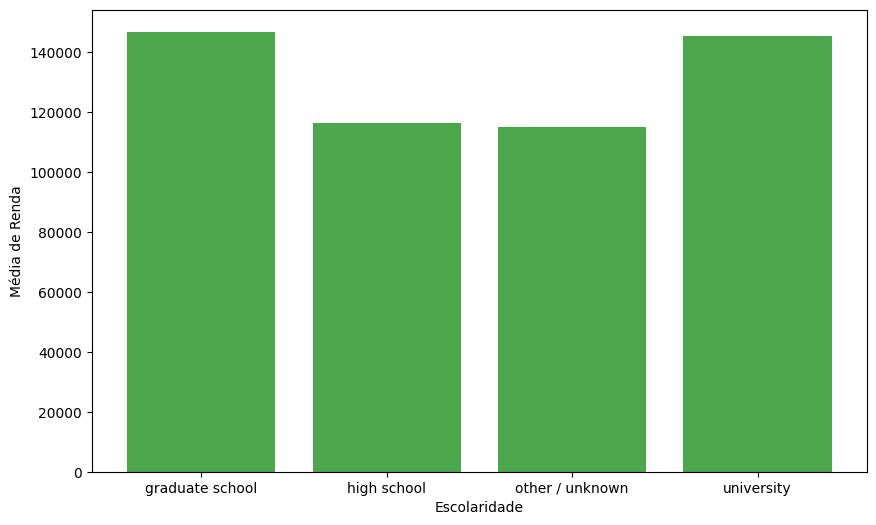

In [ ]:
# Pessoas com Education = hish school ou superior 
dfHighEducation = df[df['Education'].isin(['high school', 'university', 'gratuate school'])]

# Filtrando pessoas com high school e renda acima da média
media_renda = df['Income'].mean()
df_highschool_high_income = dfHighEducation[dfHighEducation['Income'] > media_renda]

# Comparando com a renda média de outros níveis de escolaridade
renda_media_por_escolaridade = df.groupby('Education')['Income'].mean()


# Gráfico de comparação de renda média por nível de escolaridade
plt.figure(figsize=(10, 6))
plt.bar(renda_media_por_escolaridade.index, renda_media_por_escolaridade.values, color='green', alpha=0.7)
plt.xlabel('Escolaridade')
plt.ylabel('Média de Renda')


3. Educação por por faixa etária:

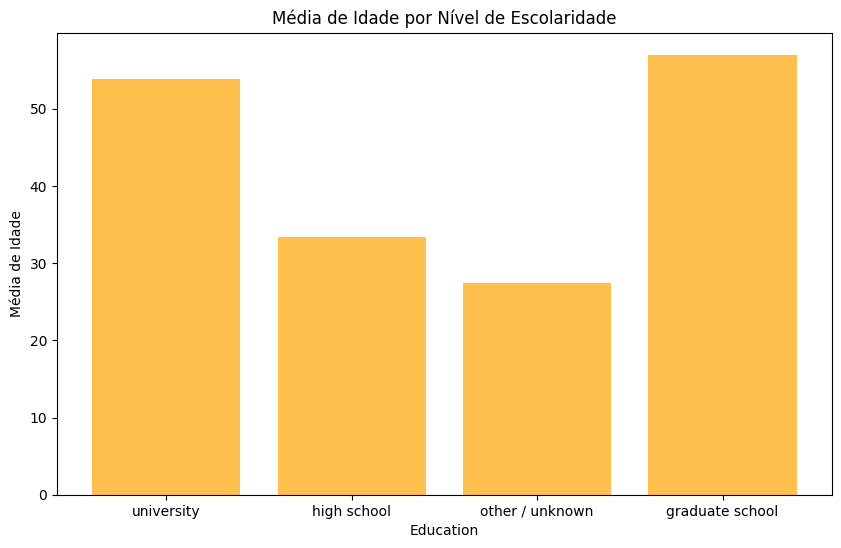

In [ ]:

# eixo_y para representar as faixas etárias e eixo_x para o nível de escolaridade
eixo_x = df['Education'].unique()
eixo_y = [df[df['Education'] == edu]['Age'].mean() for edu in eixo_x]

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.bar(eixo_x, eixo_y, color='orange', alpha=0.7)
plt.xlabel('Escolaridade')
plt.ylabel('Média de Idade')
plt.title('Média de Idade por Nível de Escolaridade')
plt.show()



4. Distribução de gênero 

Média de renda: 120954.419
Quantidade de mulheres que ganham acima da média: 1086
Quantidade de homens que ganham acima da média: 820


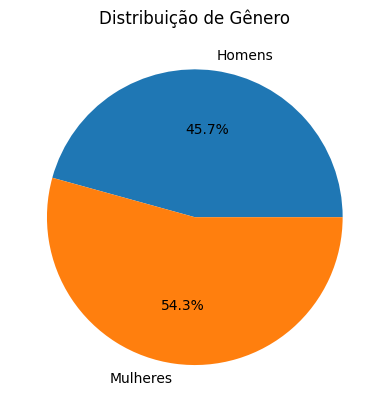

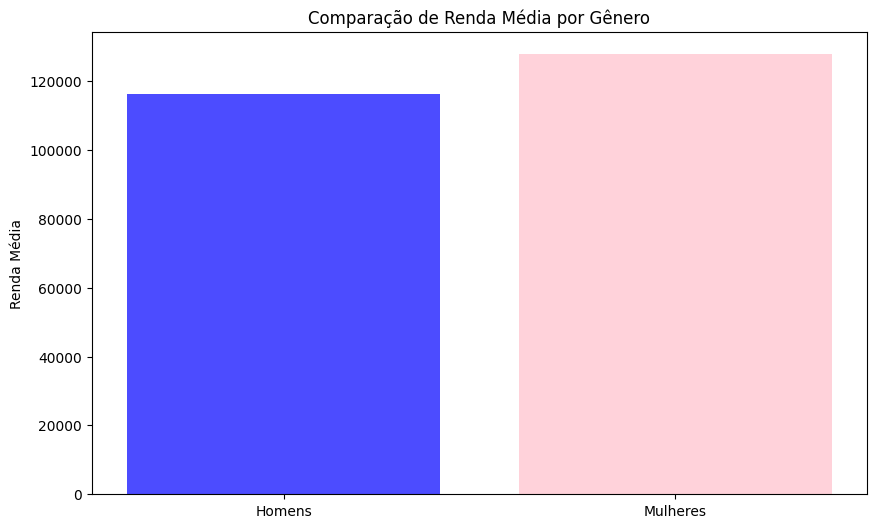

"ArithmeticError\n# média de quantos os homens ganham \nmedia_homens = df[df['Sex'] == 1]['Income'].mean()\nprint(f'Média de renda dos homens: {media_homens}')\n# média de quantos as mulheres ganham\nmedia_mulheres = df[df['Sex'] == 0]['Income'].mean()\nprint(f'Média de renda das mulheres: {media_mulheres}')\n"

In [ ]:
dfF= df[df['Sex']==0]
qtd_M = len(df) - len(dfF)

qtd_F= len(dfF)

plt.pie(x=[qtd_M,qtd_F], labels=['Homens','Mulheres'], autopct='%1.1f%%' )
plt.title('Distribuição de Gênero')

media_renda = df['Income'].mean()
print(f'Média de renda: {media_renda}')

# QUandidade de mulheres que ganham acima da renda média 
dfF = df[df['Sex'] == 0 & (df['Income'] > media_renda)]
print(f'Quantidade de mulheres que ganham acima da média: {len(dfF)}')

#Quantidade de homens que ganham acima da renda média
dfM = df[df['Sex'] == 1 & (df['Income'] > media_renda)]
print(f'Quantidade de homens que ganham acima da média: {len(dfM)}')


# Gráfico de comparação de renda média por gênero
plt.figure(figsize=(10, 6))
plt.bar(['Homens', 'Mulheres'], [dfM['Income'].mean(), dfF['Income'].mean()], color=['blue', 'pink'], alpha=0.7)
plt.ylabel('Renda Média')
plt.title('Comparação de Renda Média por Gênero')
plt.show()


5. Nivel de Escolaridade das mulheres e dos homens 

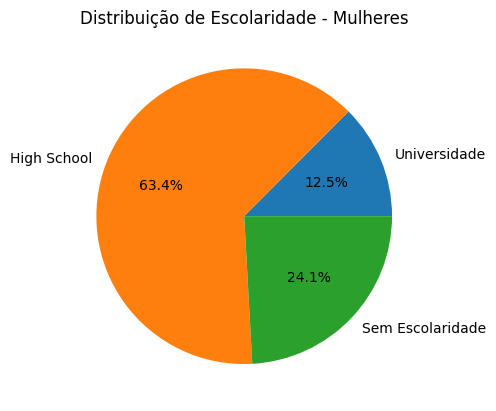

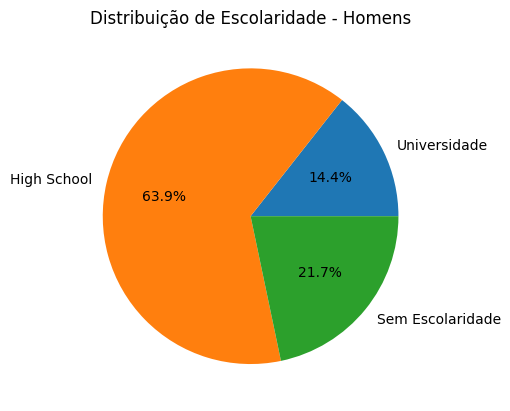

In [70]:

#Distribução da escolaridade das mulheres em gráfico de pizza 
mulheres_universidade = dfF[dfF['Education'] == 'university']
mulheres_highschool = dfF[dfF['Education'] == 'high school']
mulheres_sem_escolaridade = len(dfF) - len(mulheres_universidade) - len(mulheres_highschool) 
plt.pie([len(mulheres_universidade), len(mulheres_highschool), mulheres_sem_escolaridade,], labels=['Universidade', 'High School', 'Sem Escolaridade', ], autopct='%1.1f%%')
plt.title('Distribuição de Escolaridade - Mulheres')
plt.show()

#Distribução da escolaridade dos homens em gráfico de pizza 
homens_universidade = dfM[dfM['Education'] == 'university']
homens_highschool = dfM[dfM['Education'] == 'high school']
homens_sem_escolaridade = len(dfM) - len(homens_universidade) - len(homens_highschool) 
plt.pie([len(homens_universidade), len(homens_highschool), homens_sem_escolaridade], labels=['Universidade', 'High School', 'Sem Escolaridade', ], autopct='%1.1f%%')
plt.title('Distribuição de Escolaridade - Homens')
plt.show()


6. Distribuição da população pelo povoamento 

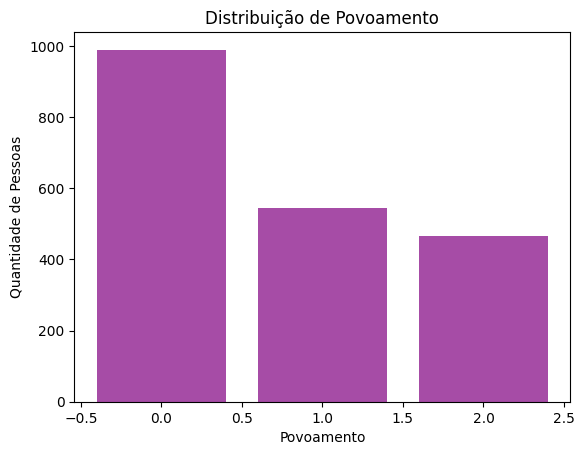

In [ ]:

povoamento = df['Settlement size'].value_counts().index

#eixo y o conttagem de pessoas e eixo x o povoamento
eixo_x = povoamento
eixo_y = df['Settlement size'].value_counts().values

# Plotando o gráfico de barras
plt.bar(eixo_x, eixo_y, color='purple', alpha=0.7)
plt.xlabel('Povoamento')
plt.ylabel('Quantidade de Pessoas')
plt.title('Distribuição de Povoamento')
plt.show()


7. Quem vive em áreas de tamanho maior tende a ter renda mais alta

Text(0.5, 1.0, 'Renda Média por Tamanho de Povoamento')

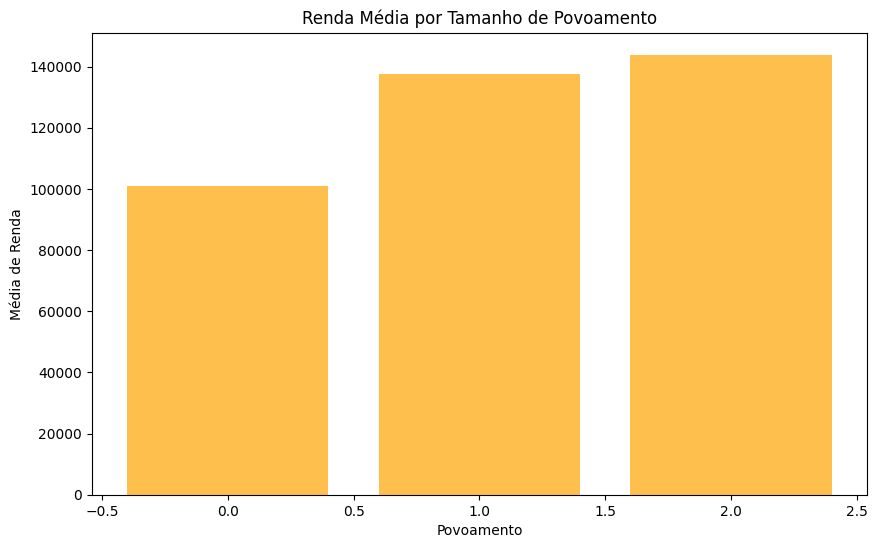

In [41]:

#eixo x os settlement size
povoamento = df['Settlement size'].value_counts().index

#eixo y a renda média por settlement size
renda_media = df.groupby('Settlement size')['Income'].mean().values


# grafico para demostrar a renda média por tamanho de povoamento 
plt.figure(figsize=(10, 6))
plt.bar(povoamento, renda_media, color='orange', alpha=0.7)
plt.xlabel('Povoamento')
plt.ylabel('Média de Renda')
plt.title('Renda Média por Tamanho de Povoamento')


8. Demonstração de idades do dataset

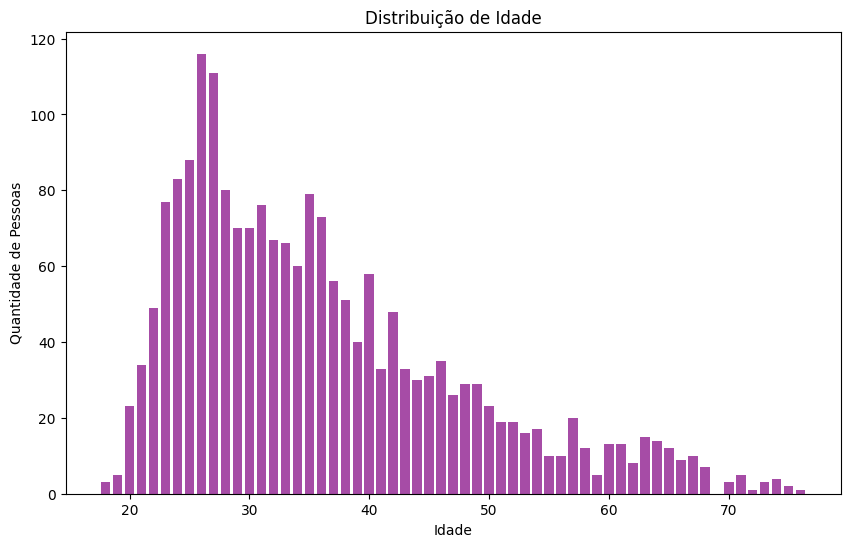

In [7]:
# eixo x a idade e eixo y a quantidade de pessoas com a idade
idade = df['Age'].value_counts().index
quantidade = df['Age'].value_counts().values
plt.figure(figsize=(10, 6))
plt.bar(idade, quantidade, color='purple', alpha=0.7)
plt.xlabel('Idade')
plt.ylabel('Quantidade de Pessoas')
plt.title('Distribuição de Idade')
plt.show()

9. A maioria dos trabalhadores manuais está entre 25 e 35 anos

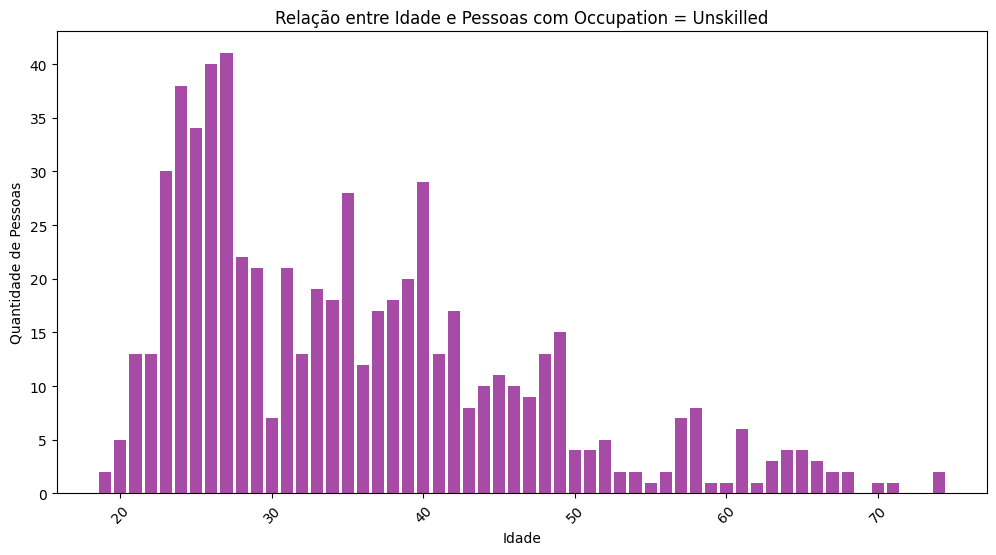

In [ ]:

df_unskilled = df[df['Occupation'] == 'unemployed / unskilled']

# Contando a quantidade de pessoas por idade
idade_unskilled = df_unskilled['Age'].value_counts().sort_index()

# Plotando o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(idade_unskilled.index, idade_unskilled.values, color='purple', alpha=0.7)
plt.xlabel('Idade')
plt.ylabel('Quantidade de Pessoas')
plt.title('Relação entre Idade e Pessoas com Occupation = Unskilled')
plt.xticks(rotation=45)
plt.show()

10. Idade x Renda 

Text(0.5, 1.0, 'Renda Média por Idade')

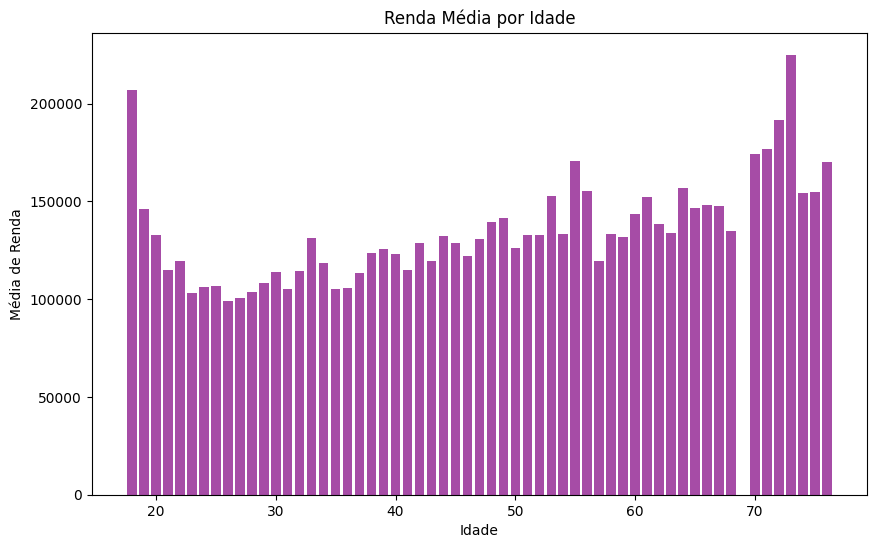

In [9]:
#eixo x as idades
idade = df['Age'].value_counts().index

#eixo y a renda média por idade 
renda_media = df.groupby('Age')['Income'].mean().values

# grafico para demostrar a renda média por idade
plt.figure(figsize=(10, 6))
plt.bar(idade, renda_media, color='purple', alpha=0.7)
plt.xlabel('Idade')
plt.ylabel('Média de Renda')
plt.title('Renda Média por Idade')